Q learning 

In [58]:
from lib.envs.MaxBiasMDP import MDP
from lib.utils.draw import draw_line
import numpy as np
%matplotlib inline
import sys
from collections import defaultdict

if "../" not in sys.path:
    sys.path.append("../")
    


In [59]:
def get_epsilon_policy(Q,nA,epsilon):

    def policy_fn(observation):
        A = np.ones(nA) * epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1 - epsilon)
        return A
    return policy_fn

In [60]:
def Q_learning_TD_control(env,num_episodes,gamma=0.9,alpha =0.5):
    
    Q = np.zeros( (env.nS,env.nA) )
    policy = get_epsilon_policy(Q,env.nA,0.1)
    
    last_step = 0   
    stats = defaultdict(lambda: [])
    cnt_left = 0
    cnt_right = 1
    for i_episode in range(num_episodes):
        last_step = 0
        total_reward = 0

        # 
        state = env.reset()

        
        while True:
            
            # experience
            action_probs = policy(state)
            action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
            next_state, reward, done = env.step(action)
           # print(f"state: {state}, action: {action}, next_state: {next_state}, reward: {reward}, done: {done}")
            # stats
            last_step += 1
            if action == 0:
                cnt_left += 1
            else :
                cnt_right += 1
            

            # TD update
            best_action = np.argmax(Q[next_state])
            td_target = reward + gamma * Q[next_state][best_action]
            td_error = td_target - Q[state][action]
            Q[state][action] += alpha * td_error
            
            total_reward += reward
            if done:
                break
            state = next_state
        # stats information
        stats['steps'].append(last_step)
        stats['rewards'].append(total_reward)
        stats['ratio'].append( (cnt_left - cnt_right) / cnt_right )
    
    return Q,stats

In [61]:
sum = np.zeros(100)

total_range = 1000

for i in range(total_range):
    if i % 10 == 0:
        #\r 实现动态更新
        print(f"\r Episode :{i/total_range * 100:.2f}% ",end = "")
        sys.stdout.flush()
    env = MDP(i)
    num_episodes = 100
    Q,stats = Q_learning_TD_control(env,num_episodes=num_episodes,gamma=1,alpha=0.1)
    sum += stats['ratio']
sum /= total_range


 Episode :99.00% 

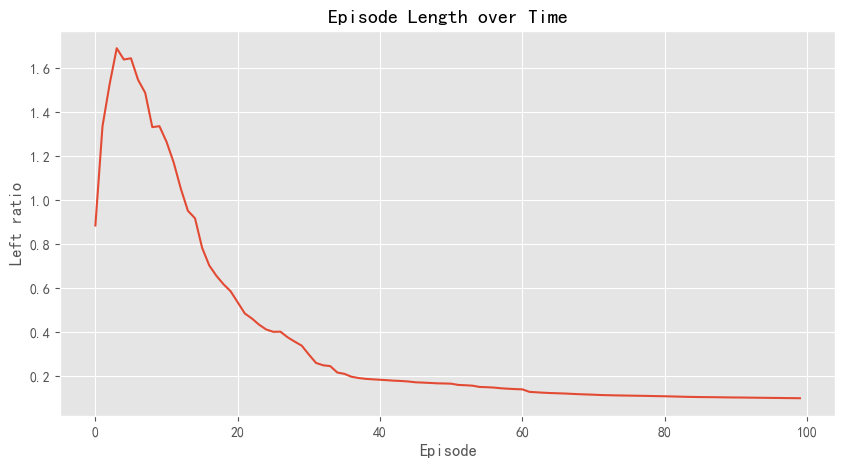

In [62]:
import matplotlib.pyplot as plt
import matplotlib
fig3 = plt.figure(figsize=(10, 5))
plt.plot(sum)
plt.xlabel("Episode")
plt.ylabel("Left ratio")
plt.title("Episode Length over Time")
plt.show(fig3)